# Practica 2 - MNist con NumPy

## Usando Numpy con MNist

MNist es un popular conjunto de datos que contiene imágenes de dígitos del 0-9 escritos a mano. Las imágenes en el conjunto están compuestas por 28x28 pixeles, cada pixel representa un tono en una escala de grises siendo 0 el valor más luminoso y 255 el valor más oscuro.

Unos ejemplos de las imágenes en MNist:

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Ejecuta la siguiente celda para importar las librerías utilizadas durante la notebook.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Una función auxiliar ```display_example``` para visualizar ejemplos en el conjunto de datos MNist.

*Nota: No olvides ejecutar la celda*

In [ ]:
def display_example(x, example_width=None):
    """Muestra un ejemplo en forma 1D como una imagen"""
    # Compute rows, cols
    if x.ndim == 1:
        n = x.size
        m = 1
        x = x[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input x should be 1 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n // example_width

    plt.imshow(x[0].reshape(example_height, example_width),
                        cmap='Greys', extent=[0, 1, 0, 1])
    plt.show()

## Cargando los datos usando Numpy

Usarémos la función ```loadtxt``` para cargar una versión de MNist que está en nuestra máquina asignada por colab.

In [ ]:
MNist = np.loadtxt("sample_data/mnist_train_small.csv", delimiter=',')
MNist

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

El conjunto de datos MNist en Colab está formado por imágenes de ejemplo. Cada ejemplo en el conjunto es una fila en el arreglo de NumPy.

Cada ejemplo (fila) es un arreglo con $785$ elementos, el primer elemento es la etiqueta del dígito (un entero de $0$ a $9$). El resto de los elementos ($784$) son los pixeles de la imágen ($28\times28 = 784$).

In [ ]:
print(MNist.shape)
print(MNist.size)

(20000, 785)
15700000


## ¿Cuántos ejemplos (filas) tenemos en el conjunto de datos?

Utiliza NumPy para calcular el número de filas en el set de datos, rellena el código para guardar el valor en la variable ```m```.

In [ ]:
m = MNist.shape[0]#<rellena>
print("El set de datos contiene ", m, " ejemplos.")

El set de datos contiene  20000  ejemplos.


## Separando los datos.

En la siguiente celda, deberás completar el código para separar el conjunto de datos en dos, un conjunto ```X``` que contendrá únicamente los pixeles de las imágenes y un conjunto ```y``` que contendrá las etiquetas asociadas al número que está en la imágen.

Utiliza slicing con NumPy para seleccionar los elementos adecuados.

In [ ]:
X = MNist[:,1:]# <completa>
y = MNist[:,0]# <completa>

Comprueba ejecutando la siguiente celda:

In [ ]:
assert y.shape == (20000,) and X.shape == (20000, 784), "Error en las dimensiones de X o y"
print("X.shape:", X.shape)
print("y.shape:", y.shape)
print("\nX=", X)
print("\ny=", y)

X.shape: (20000, 784)
y.shape: (20000,)

X= [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y= [6. 5. 7. ... 2. 9. 5.]


#Obtener un subconjunto de datos de entrenamiento (Xtrain) equivalente al 80% de los datos de X.

In [ ]:
import random

np.random.seed(1)
indices80=np.random.choice(MNist.shape[0], int(len(MNist)*0.8), replace=False)
Xtrain = X[indices80]
ytrain = y[indices80]
print(Xtrain.shape)
print(ytrain.shape)

(16000, 784)
(16000,)


# Obtener el subconjunto de datos de prueba (Xtest) restantes (20%)

In [ ]:
indices20 = list(set(range(len(X)))-set(indices80))
Xtest = X[indices20]
ytest = y[indices20]
print(Xtest.shape)
print(ytest.shape)

(4000, 784)
(4000,)


## Visualizando las imágenes en el set de datos

Usemos la función auxiliar display_example para visualizar los ejemplos en el set de datos. Intentar cambiar el valor de ```i``` para mostrar una ejemplo distinto.

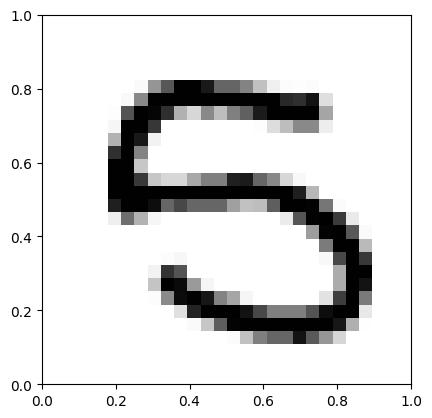

Imágen con etiqueta:  5.0


In [ ]:
#puedes cambiar el valor de i
i = 19999

example = X[i]
example_label = y[i]
display_example(example)
print("Imágen con etiqueta: ", example_label)

## Contando el número de ejemplos para cada "clase"

Rellena la función ```count_class_examples()``` para imprimir el número de ejemplos de cada etiqueta en el set de datos. Esto es, el número de ceros, de unos, dos, ..., nueves.

Para MNist las etiquetas $y \in \{0, 1, 2, \dots, 9\}$

In [ ]:
def count_class_examples(y):
  """Imprime el numero de ejemplos para cada clase en y.

  Argumentos
  y - arreglos de numpy que contiene etiquetas
  """

  for i in range(10):
    count = np.count_nonzero(y == i)# <completa>
    print("Numero de ", i, count)

In [ ]:
count_class_examples(y)

Numero de  0 1962
Numero de  1 2243
Numero de  2 1989
Numero de  3 2021
Numero de  4 1924
Numero de  5 1761
Numero de  6 2039
Numero de  7 2126
Numero de  8 1912
Numero de  9 2023


Otra forma de hacerlo es:

In [ ]:
def count_class_examples(y):
  """Imprime el numero de ejemplos para cada clase en y.

  Argumentos
  y - arreglos de numpy que contiene etiquetas
  """
  count=[]
  for i in range(10):
    #count = np.sum(y==i)
    count.append(np.sum(y==i))
    #print("Numero de ", i, count)
  return count

In [ ]:
conteo = count_class_examples(y)
#print(conteo)
for i, w in enumerate(conteo):
  print("Número de ", i, w)
print(np.sum(conteo))

Número de  0 1962
Número de  1 2243
Número de  2 1989
Número de  3 2021
Número de  4 1924
Número de  5 1761
Número de  6 2039
Número de  7 2126
Número de  8 1912
Número de  9 2023
20000


## Calcula el arreglo representativo para cada clase

Utiliza Numpy para encontrar el arreglo representativo promediando los arreglos para cada clase. Rellena la función ``` class_means``` para que devuelva un arreglo de NumPy que contenga en cada fila el arreglo promedio de los respectivos ejemplos (del dígito 0 al 9).

In [ ]:
"""
def class_means(X, y):

  #Calcula el arreglo promedio (representativo) de cada clase

  # Numero de ejemplos (filas)
  m = X.shape[0]
  # Numero de features (columnas)
  n = X.shape[1]
  # Clases distintas en el set
  ulabels = np.unique(y)
  # Numero de clases
  classes = ulabels.size
  # Rellena means con el arreglo promedio de cada clase
  means = np.empty((classes, n))
"""
def class_means(X, y):
  """
  Calcula el arreglo promedio (representativo) de cada clase
  """
  # Numero de ejemplos (filas)
  m = X.shape[0]
  # Numero de features (columnas)
  n = X.shape[1]
  # Clases distintas en el set
  ulabels = np.unique(y)
  # Numero de clases
  classes = ulabels.size

  # Rellena means con el arreglo promedio de cada clase
  means = np.empty((classes, n))

  for i in range(classes):
    #means[i,:] = # <completa>
    means[i,:] = np.mean(X[y == ulabels[i]], axis =0) # <completa>

  return means

In [ ]:
class_representatives = class_means(Xtrain, ytrain)

#shape del arreglo que contiene los representativos
class_representatives.shape

(10, 784)

In [ ]:
assert np.array_equal(class_means(np.array([[4, 6], [2, 4], [10, 4], [2, 6]]), np.array([1, 2, 1, 2])), np.array([[7, 5], [2, 5]])), "Error"
assert class_representatives.shape == (10, 784), "Error en las dimensiones de class_representatives"
print("Funcion clas_means es correcta")

Funcion clas_means es correcta


Utiliza la función ```display_example``` para mostrar el ejemplo promedio de la clase (para cada clase).

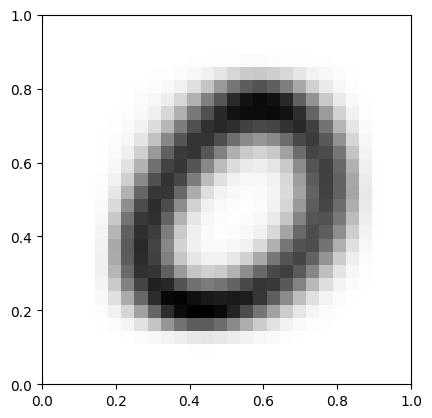

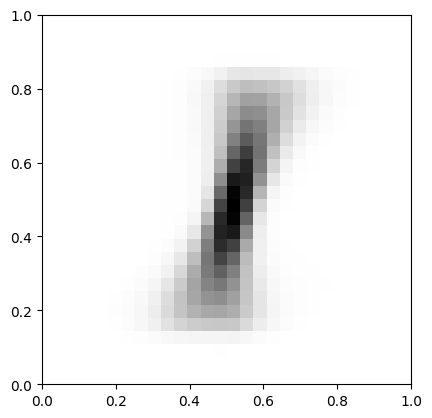

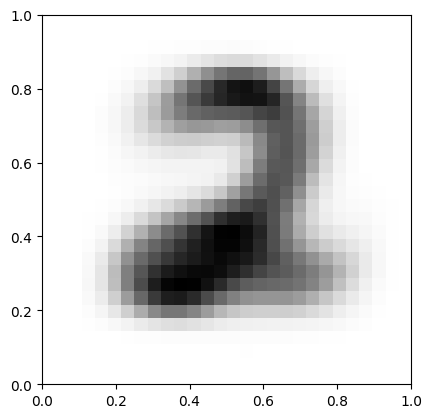

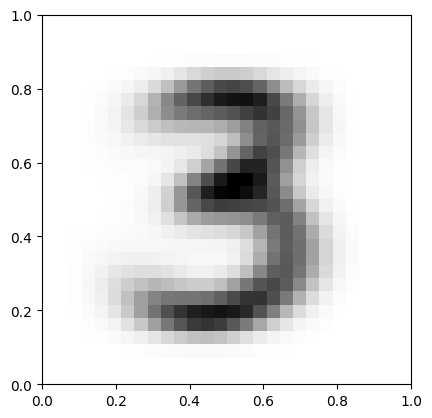

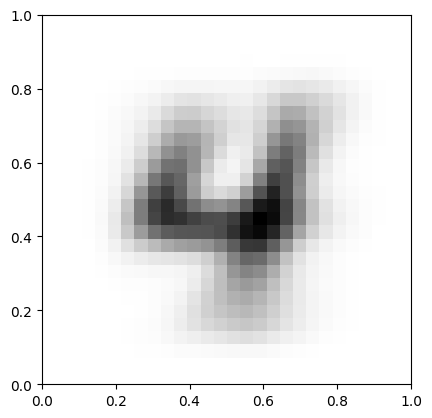

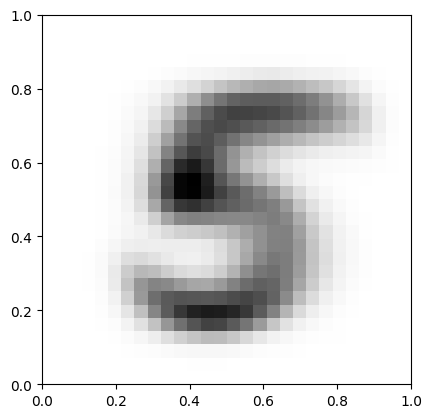

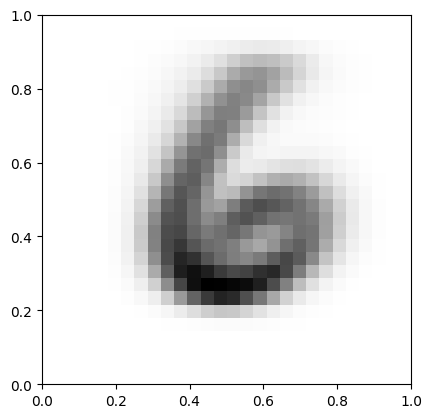

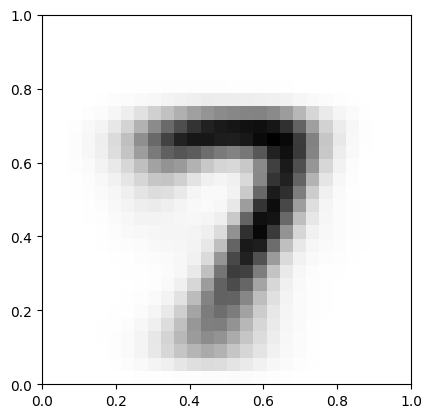

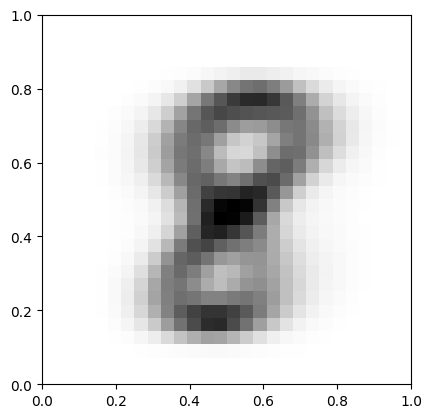

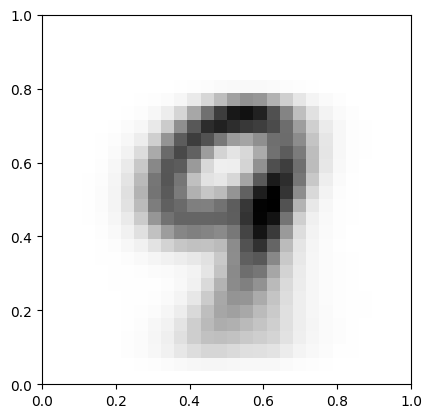

In [ ]:
for i in range(10):
  display_example(class_representatives[i])

## Clasificador de dígitos usando distancias

En esta sección, generaremos un modelo para identificar dígitos mediante el uso de distancias euclidianas. Calcularemos la distancia entre cada ejemplo en el conjunto y los dígitos representativos de cada clase (el valor promedio de cada clase). Le asignaremos a cada ejemplo la etiqueta del dígito representativo con menor distancia.

### Distancia Euclidiana

En la siguiente celda, rellena la función ```euclidean_distance``` para calcular la distancia euclidiana entre los puntos P y Q.

La distancia euclidiana entre dos puntos P y Q en un espacio n-dimesional es:

$$d_e(P, Q) = \sqrt{(p_1 - q_1)^2+(p_2-q_2)^2 + \dots+(p_n-q_n)^2} = \sqrt{\sum_{i=1}^{n}(p_i-q_i)^2} $$

In [ ]:
def euclidean_distance(P, Q):
  """
  Calcula la distancia euclidiana entre los elementos de P y Q
  """
# e_distance = # <completa>
  e_distance = np.sqrt(np.sum((P-Q)**2,axis=1))
  return e_distance

def euclidean_distance_for(P, Q):
  """
  Calcula la distancia euclidiana entre los elementos de P y Q
  """
  if P.ndim > 1:
    P = P[0]
  if Q.ndim > 1:
    Q = Q[0]

  e_distance = 0
  for i in range(len(P)):
    e_distance += (P[i]-Q[i])**2
  e_distance = np.sqrt(e_distance)
  return e_distance
# e_distance = # <completa>

#  e_distance = np.sqrt(np.sum((P-Q)**2))
#  return e_distance


In [ ]:
a = np.array([[1, 2, 3]])
b = np.array([[3, 3, 5],[3, 3, 5],[3, 3, 5],[3, 3, 5],[3, 3, 5],[3, 3, 5],[3, 3, 5],[3, 3, 5],[3, 3, 5],[3, 3, 5]])
print(euclidean_distance(a, b))
print(euclidean_distance_for(a, b))

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
3.0


In [ ]:
assert euclidean_distance(np.array([[1, 2, 3]]), np.array([[3, 3, 5]]))[0] == 3.0, "Error en euclidean_distance"

## Obten el representante más cercano para cada ejemplo

Rellena la función ```closest_point``` para asignar a cada ejemplo la etiqueta del dígito más cercano según su distancia al arreglo representativo.

*¿Puedes hacerlo con 2, 1 o ningún ciclo for?*

In [ ]:
def closest_point(X, representatives):
  """
  Devuelve un arreglo con la etiqueta del elemento mas cercano
  para cada ejemplo en X

  X -  el arreglo con los ejemplos
  representatives - el arreglo con los elementos representativos de cada clase
  """
  # Numero de ejemplos (filas)
  m = X.shape[0]
  # Numero de features (columnas)
  n = X.shape[1]
  # Numero de clases
  classes = representatives.shape[0]

  # Distancias minimas
  min_distances = np.full(m, np.inf)
  # El indice de la mejor distancia
  best = np.zeros((X.shape[0]), dtype=np.int8)
  """
Para cada ejemplo en X:
1. Calcular la distancia del ejemplo a todos los vectores representativos
2. Guardar los valores de distancia en un arreglo (10 valores)
3. Obtener el índice del valor mínimo
4. Guardar el índice en la lista que se devolverá al final

Al final, la lista contiene los valores de la clase cuyo centroide es el más cercano a cada ejemplo
  """
  # <rellena>
  for i,x in enumerate(X):
    best[i]=np.argmin(euclidean_distance(x,representatives))
  return best

In [ ]:
print(euclidean_distance(X[0],class_representatives))

[2267.58876959 2376.39653221 2099.9591202  2404.03724386 2210.90138728
 2341.36789856 2226.21926406 2325.04672753 2271.99998542 2329.20568008]


In [ ]:
print(class_representatives.shape)
print(X[0].shape)

(10, 784)
(784,)


In [ ]:
y_pred = closest_point(Xtest, class_representatives)

In [ ]:
assert y_pred.shape == (20000,) or y_pred.shape == (20000), "Error en las dimensiones de y_pred"

AssertionError: Error en las dimensiones de y_pred

In [ ]:
print(y_pred)

[8 8 2 ... 1 8 5]


## Visualiza las predicciones

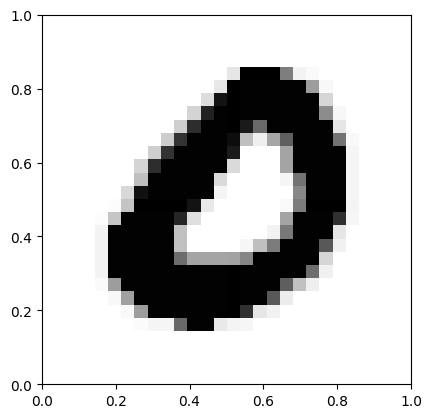

Imágen con etiqueta:  0.0  modelo dice: 5


In [ ]:
#intenta cambiar el valor de i
i = 109

example = X[i]
pred_label = y_pred[i]
true_label = y[i]
display_example(example)
print("Imágen con etiqueta: ", true_label, " modelo dice:", pred_label)

## Evaluando el clasificador

Una vez que tienes un modelo, debes evaluarlo para saber que tan bien (o mal) está haciendo su trabajo. Para el modelo clasificador de dígitos, usaremos una métrica típica de evaluación.

## Exactitúd (Accuracy)

La exactitúd o accuracy mide el rendimiento general del modelo.

Utiliza la siguiente fórmula para completar la función ```accuracy``` para medir el rendimiento del modelo de clasificación de dígitos:

$$\texttt{accuracy}(y, \hat{y}) = \frac{1}{m} \sum_{i=0}^{m-1} 1(\hat{y}_i = y_i)$$

$$ 1(\hat{y}_i = y_i) = 1 \quad \text{cuando} \quad \hat{y}_i = y_i$$

$$ 1(\hat{y}_i = y_i) = 0 \quad \text{cuando} \quad \hat{y}_i \neq y_i$$

$$m \quad \text{es el número de ejemplos}$$

In [ ]:
def accuracy(y, y_pred):
  """
  Devuelve la exactitud dados dos vectores "y" con la verdad
  y "y_pred" con las predicciones
  """
  iguales = np.where(y==y_pred)[0]
  acc = iguales.size/y.size*100
  return acc

In [ ]:
print(accuracy(ytest, y_pred), '%')

81.5 %


¿Consideras que el modelo es bueno para predecir dígitos escritos a mano?, ¿crees que hay margen de mejora?